## INTRODUCTION
- It’s a Python based scientific computing package targeted at two sets of audiences:
    - A <U>replacement for NumPy</U> to use the power of GPUs
    - Deep learning research platform that provides maximum flexibility and speed
- pros: 
    - Interactively debugging PyTorch. Many users who have used both frameworks would argue that makes pytorch significantly easier to debug and visualize.
    - Clean support for dynamic graphs
    - Organizational backing from Facebook
    - Blend of high level and low level APIs
- cons:
    - Much less mature than alternatives
    - Limited references / resources outside of the official documentation
- I accept you know neural network basics. If you do not know check my tutorial. Because I will not explain neural network concepts detailed, I only explain how to use pytorch for neural network
- Neural Network tutorial: https://www.kaggle.com/kanncaa1/deep-learning-tutorial-for-beginners 
- The most important parts of this tutorial from matrices to ANN. If you learn these parts very well, implementing remaining parts like CNN or RNN will be very easy. 
<br>
<br>**Content:**
1. [Basics of Pytorch](#1)
    - Matrices
    - Math
    - Variable
1. [Linear Regression](#2)
1. [Logistic Regression](#3)
1. [Artificial Neural Network (ANN)](#4)

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))  
# os.listdir(path) 함수: 지정된 경로(path)에 있는 모든 파일과 디렉토리의 이름을 리스트 형태로 반환
# "../input": 현재 작업 디렉토리의 상위 디렉토리 내에 위치한 input 디렉토리

# Any results you write to the current directory are saved as output.

['sample_submission.csv', 'train.csv', 'test.csv']


<a id="1"></a> <br>
## Basics of Pytorch
### Matrices
- In pytorch, matrix(array) is called <U>tensor</U>s.
- 3*3 matrix koy. This is 3x3 tensor.
- Lets look at array example with numpy that we already know.
    - We create numpy array with np.numpy() method
    - Type(): type of the array. In this example it is numpy
    - np.shape(): shape of the array. Row x Column

In [3]:
# import numpy library
import numpy as np

# numpy array
array = [[1,2,3],[4,5,6]]
first_array = np.array(array) # 2x3 array
print("Array Type: {}".format(type(first_array))) # type
print("Array Shape: {}".format(np.shape(first_array))) # shape
print(first_array)

Array Type: <class 'numpy.ndarray'>
Array Shape: (2, 3)
[[1 2 3]
 [4 5 6]]


- We looked at numpy array.
- Now examine how we implement tensor(pytorch array)
- import pytorch library with import torch
- We <U>create</U> tensor with __torch.Tensor()__ method
- __.type__: type of the array. In this example it is tensor
- __.shape__: shape of the array. Row x Column

In [4]:
# import pytorch library
import torch

# pytorch array
tensor = torch.Tensor(array)
print("Array Type: {}".format(tensor.type)) # type
print("Array Shape: {}".format(tensor.shape)) # shape
print(tensor)

Array Type: <built-in method type of Tensor object at 0x7d74f7ada120>
Array Shape: torch.Size([2, 3])
tensor([[1., 2., 3.],
        [4., 5., 6.]])


- Allocation(공간 할당) is one of the most used technique in coding. Therefore lets learn how to make it with pytorch.
- In order to learn, compare numpy and tensor
    - np.ones() = __torch.ones()__
    - np.random.rand() = __torch.rand()__

In [5]:
# numpy ones
print("Numpy {}\n".format(np.ones((2,3))))

# pytorch ones
print(torch.ones((2,3)))

Numpy [[1. 1. 1.]
 [1. 1. 1.]]

tensor([[1., 1., 1.],
        [1., 1., 1.]])


In [6]:
# numpy random
print("Numpy {}\n".format(np.random.rand(2,3)))

# pytorch random
print(torch.rand(2,3))

Numpy [[0.83633417 0.2807372  0.50281296]
 [0.177646   0.89978902 0.51684175]]

tensor([[0.2317, 0.7427, 0.9085],
        [0.8422, 0.9230, 0.3112]])


- Even if when I use pytorch for neural networks, I feel better if I use numpy. Therefore, usually <U>convert</U> result of neural network that is tensor <U>to numpy</U> array <U>to visualize or examine</U>.
- Lets look at conversion between tensor and numpy arrays.
    - __torch.from_numpy()__: from numpy to tensor
    - __.numpy()__: from tensor to numpy

In [7]:
# random numpy array
array = np.random.rand(2,2)
print("{} {}\n".format(type(array),array))

# from numpy to tensor
from_numpy_to_tensor = torch.from_numpy(array)
print("{}\n".format(from_numpy_to_tensor))

# from tensor to numpy
tensor = from_numpy_to_tensor
from_tensor_to_numpy = tensor.numpy()
print("{} {}\n".format(type(from_tensor_to_numpy),from_tensor_to_numpy))

<class 'numpy.ndarray'> [[0.17668244 0.30421673]
 [0.92662777 0.06804259]]

tensor([[0.1767, 0.3042],
        [0.9266, 0.0680]], dtype=torch.float64)

<class 'numpy.ndarray'> [[0.17668244 0.30421673]
 [0.92662777 0.06804259]]



### Basic Math with Pytorch
- Resize: view()
- a and b are tensor.
- Addition: __torch.add(a,b)__ = a + b
- Subtraction: __a.sub(b)__ = a - b
- Element wise multiplication: __torch.mul(a,b)__ = a * b 
- Element wise division: __torch.div(a,b)__ = a / b 
- Mean: __a.mean()__
- Standart Deviation (std): __a.std()__

In [8]:
# create tensor 
tensor = torch.ones(3,3)
print("\n",tensor)

# Resize
print("{}{}\n".format(tensor.view(9).shape,tensor.view(9)))

# Addition
print("Addition: {}\n".format(torch.add(tensor,tensor)))

# Subtraction
print("Subtraction: {}\n".format(tensor.sub(tensor)))

# Element wise multiplication
print("Element wise multiplication: {}\n".format(torch.mul(tensor,tensor)))

# Element wise division
print("Element wise division: {}\n".format(torch.div(tensor,tensor)))

# Mean
tensor = torch.Tensor([1,2,3,4,5])
print("Mean: {}".format(tensor.mean()))

# Standart deviation (std)
print("std: {}".format(tensor.std()))


 tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])
torch.Size([9])tensor([1., 1., 1., 1., 1., 1., 1., 1., 1.])

Addition: tensor([[2., 2., 2.],
        [2., 2., 2.],
        [2., 2., 2.]])

Subtraction: tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])

Element wise multiplication: tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])

Element wise division: tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])

Mean: 3.0
std: 1.5811388492584229


### Variables
- It accumulates gradients. 
- We will use pytorch in neural network. And as you know, in neural network we have backpropagation where gradients are calculated. Therefore we need to handle gradients. If you do not know neural network, check my deep learning tutorial first because I will not explain detailed the concepts like optimization, loss function or backpropagation. 
- Deep learning tutorial: https://www.kaggle.com/kanncaa1/deep-learning-tutorial-for-beginners
- Difference between variables and tensor is <U>variable accumulates gradients</U>.
- We can make math operations with variables, too.
- In order to make <U>backward propagation</U> we need variables

In [9]:
# import variable from pytorch library
from torch.autograd import Variable
# Variable: PyTorch에서 자동 미분을 가능하게 하는 핵심 클래스

# define variable
var = Variable(torch.ones(3), requires_grad = True)  # (3): 크기 3인 1차원 텐서
# requires_grad = True: 모든 연산 추적, 연산 과정에서 발생하는 모든 그래디언트(미분값) 계산
var

tensor([1., 1., 1.], requires_grad=True)

- Assume we have equation y = x^2
- Define x = [2,4] variable
- After calculation we find that y = [4,16] (y = x^2)
- Recap <U>o equation</U> is that o = (1/2)*sum(y) = (1/2)*sum(x^2)
- deriavative of o = x
- Result is equal to x so gradients are [2,4]
- Lets implement

In [10]:
# lets make basic backward propagation
# we have an equation that is y = x^2
array = [2,4]
tensor = torch.Tensor(array)
x = Variable(tensor, requires_grad = True)
y = x**2
print(" y =  ",y)

# recap o equation o = 1/2*sum(y)
o = (1/2)*sum(y)
print(" o =  ",o)

# backward
o.backward() # calculates gradients

# As I defined, variables accumulates gradients. In this part there is only one variable x.
# Therefore variable x should be have gradients
# Lets look at gradients with x.grad
print("gradients: ",x.grad)

 y =   tensor([ 4., 16.], grad_fn=<PowBackward0>)
 o =   tensor(10., grad_fn=<MulBackward0>)
gradients:  tensor([2., 4.])


<a id="2"></a> <br>
### Linear Regression
- Detailed linear regression tutorial is in my machine learning tutorial in part "Regression". I will not explain it in here detailed.
- Linear Regression tutorial: https://www.kaggle.com/kanncaa1/machine-learning-tutorial-for-beginners
- y = Ax + B.
    - A = slope of curve
    - B = bias (point that intersect y-axis)
- For example, we have car company. If the car price is low, we sell more car. If the car price is high, we sell less car. This is the fact that we know and we have data set about this fact.
- The question is that what will be number of car sell if the car price is 100.

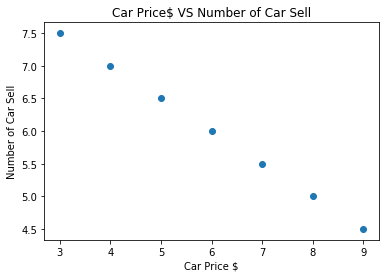

In [11]:
# As a car company we collect this data from previous selling
# lets define car prices
car_prices_array = [3,4,5,6,7,8,9]  # 자동차 가격 데이터를 리스트로 정의
car_price_np = np.array(car_prices_array,dtype=np.float32) # 리스트->numpy 배열, 데이터 타입:np.float32로 지정
car_price_np = car_price_np.reshape(-1,1)  # -1: 나머지 차원의 크기에 맞춰 자동으로 결
car_price_tensor = Variable(torch.from_numpy(car_price_np)) # numpy->텐서, Variable로 자동 미분 가능하게

# lets define number of car sell
number_of_car_sell_array = [ 7.5, 7, 6.5, 6.0, 5.5, 5.0, 4.5]
number_of_car_sell_np = np.array(number_of_car_sell_array,dtype=np.float32)
number_of_car_sell_np = number_of_car_sell_np.reshape(-1,1)
number_of_car_sell_tensor = Variable(torch.from_numpy(number_of_car_sell_np))

# lets visualize our data
import matplotlib.pyplot as plt
plt.scatter(car_prices_array,number_of_car_sell_array)
plt.xlabel("Car Price $")
plt.ylabel("Number of Car Sell")
plt.title("Car Price$ VS Number of Car Sell")
plt.show()

- Now this plot is our collected data
- We have a question that is what will be number of car sell if the car price is 100$
- In order to solve this question we need to use linear regression.
- We need to line fit into this data. Aim is fitting line with minimum error.
- <U>Steps of Linear Regression</U>
    1. create LinearRegression class
    1. define model from this LinearRegression class
    1. MSE: Mean squared error
    1. Optimization (SGD:stochastic gradient descent)
    1. Backpropagation
    1. Prediction
- Lets implement it with Pytorch

epoch 0, loss 44.871543884277344
epoch 50, loss 5.546808242797852
epoch 100, loss 3.7482106685638428
epoch 150, loss 2.532822608947754
epoch 200, loss 1.7115353345870972
epoch 250, loss 1.156556487083435
epoch 300, loss 0.7815337181091309
epoch 350, loss 0.5281155705451965
epoch 400, loss 0.35686957836151123
epoch 450, loss 0.24115172028541565
epoch 500, loss 0.16295647621154785
epoch 550, loss 0.11011636257171631
epoch 600, loss 0.07441014796495438
epoch 650, loss 0.050281886011362076
epoch 700, loss 0.03397737443447113
epoch 750, loss 0.02296009473502636
epoch 800, loss 0.015515184961259365
epoch 850, loss 0.010484294034540653
epoch 900, loss 0.007084742654114962
epoch 950, loss 0.004787474405020475
epoch 1000, loss 0.0032351838890463114


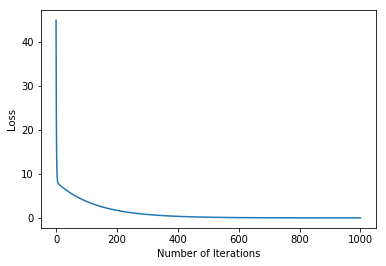

In [12]:
# Linear Regression with Pytorch

# libraries
import torch      
from torch.autograd import Variable  

import torch.nn as nn 
# nn 모듈: 신경망을 구성하는 데 사용되는 다양한 클래스와 함수들이 포함

import warnings
warnings.filterwarnings("ignore")
# 경고 메시지 필터링하는 방법 지정, "ignore": 모든 경고 무시

# create class
class LinearRegression(nn.Module):
    def __init__(self,input_size,output_size):
        # super function. It inherits from nn.Module and we can access everythink in nn.Module
        super(LinearRegression,self).__init__()
        
        # Linear function.
        self.linear = nn.Linear(input_dim,output_dim)

    def forward(self,x):
        return self.linear(x)
    
# define model
input_dim = 1
output_dim = 1
model = LinearRegression(input_dim,output_dim) # input and output size are 1

# MSE
mse = nn.MSELoss()

# Optimization (find parameters that minimize error)
learning_rate = 0.02   # how fast we reach best parameters
optimizer = torch.optim.SGD(model.parameters(),lr = learning_rate)
# SGD:각 반복(iteration)에서 무작위로 선택한 데이터에 대한 그래디언트 사용하여 모델의 가중치 업데이트

# train model
loss_list = []
iteration_number = 1001
for iteration in range(iteration_number):
        
    # optimization
    optimizer.zero_grad() # 그래디언트 0으로 초기화, 매 훈련 반복(iteration) 시작 전에 이전 그래디언트 소거
    
    # Forward to get output
    results = model(car_price_tensor)
    
    # Calculate Loss
    loss = mse(results, number_of_car_sell_tensor)
    
    # backward propagation
    loss.backward()
    
    # Updating parameters
    optimizer.step()
    
    # store loss
    loss_list.append(loss.data)
    
    # print loss
    if(iteration % 50 == 0):
        print('epoch {}, loss {}'.format(iteration, loss.data))

plt.plot(range(iteration_number),loss_list)
plt.xlabel("Number of Iterations")
plt.ylabel("Loss")
plt.show()

- Number of iteration is 1001.
- Loss is almost zero that you can see from plot or loss in epoch number 1000.
- Now we have a trained model.
- While usign trained model, lets predict car prices.

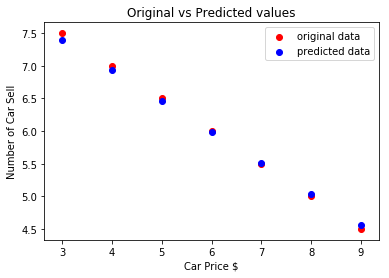

In [13]:
# predict our car price 
predicted = model(car_price_tensor).data.numpy()
#.data: Variable 객체 내부에 저장된 실제 텐서 데이터에 접근하기 위해 사용
plt.scatter(car_prices_array,number_of_car_sell_array,label = "original data",color ="red")
plt.scatter(car_prices_array,predicted,label = "predicted data",color ="blue")

# predict if car price is 10$, what will be the number of car sell
#predicted_10 = model(torch.from_numpy(np.array([10]))).data.numpy()
#plt.scatter(10,predicted_10.data,label = "car price 10$",color ="green")
plt.legend()
plt.xlabel("Car Price $")
plt.ylabel("Number of Car Sell")
plt.title("Original vs Predicted values")
plt.show()

<a id="3"></a> <br>
### Logistic Regression
- Linear regression is not good at classification.
- We use logistic regression for <U>classification</U>.
- <U>linear regression + logistic function(softmax)</U> = logistic regression
- Check my deep learning tutorial. There is detailed explanation of logistic regression. 
    - https://www.kaggle.com/kanncaa1/deep-learning-tutorial-for-beginners
- **Steps of Logistic Regression**
    1. Import Libraries
    1. Prepare Dataset
        - We use MNIST dataset.
        - There are 28*28 images and 10 labels from 0 to 9
        - Data is not normalized so we divide each image to 255 that is basic normalization for images.
        - In order to split data, we use train_test_split method from sklearn library
        - Size of train data is 80% and size of test data is 20%.
        - Create feature and target tensors. At the next parts we create variable from these tensors. As you remember we need to define variable for accumulation of gradients.
        - batch_size = batch size means is that for example we have data and it includes 1000 sample. We can train 1000 sample in a same time or we can divide it 10 groups which include 100 sample and train 10 groups in order. Batch size is the group size. For example, I choose batch_size = 100, that means in order to train all data only once we have 336 groups. We train each groups(336) that have batch_size(quota) 100. Finally we train 33600 sample one time.
        - epoch: 1 epoch means training all samples one time.
        - In our example: we have 33600 sample to train and we decide our batch_size is 100. Also we decide epoch is 29(accuracy achieves almost highest value when epoch is 29). Data is trained 29 times. Question is that how many iteration do I need? Lets calculate: 
            - training data 1 times = training 33600 sample (because data includes 33600 sample) 
            - But we split our data 336 groups(group_size = batch_size = 100) our data 
            - Therefore, 1 epoch(training data only once) takes 336 iteration
            - We have 29 epoch, so total iterarion is 9744(that is almost 10000 which I used)
        - __TensorDataset()__: Data set wrapping tensors. Each sample is retrieved by indexing tensors along the first dimension.
        - __DataLoader()__: It combines dataset and sample. It also provides multi process iterators over the dataset.
        - Visualize one of the images in dataset
    1. Create Logistic Regression Model
        - Same with linear regression.
        - However as you expect, there should be logistic function in model right?
        - In pytorch, logistic function is in the loss function where we will use at next parts.
    1. Instantiate Model
        - input_dim = 28*28 # size of image px*px
        - output_dim = 10  # labels 0,1,2,3,4,5,6,7,8,9
        - create model
    1. Instantiate Loss 
        - Cross entropy loss
        - It calculates loss that is not surprise :)
        - It also has softmax(logistic function) in it.
    1. Instantiate Optimizer 
        - SGD Optimizer
    1. Traning the Model
    1. Prediction
- As a result, as you can see from plot, while loss decreasing, accuracy(almost 85%) is increasing and our model is learning(training).    

In [14]:
# Import Libraries
import torch
import torch.nn as nn
from torch.autograd import Variable
from torch.utils.data import DataLoader
import pandas as pd
from sklearn.model_selection import train_test_split

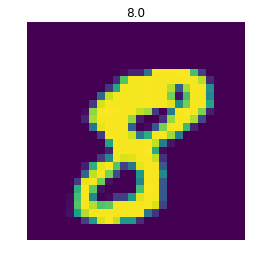

In [15]:
# Prepare Dataset
# load data
train = pd.read_csv(r"../input/train.csv",dtype = np.float32)

# split data into features(pixels) and labels(numbers from 0 to 9)
targets_numpy = train.label.values  
#.열 이름:DataFrame에서 특정한 열(컬럼)을 선택할 때 사용 
#.values:Pandas Series나 DataFrame에서 데이터를 NumPy 배열 형태로 반환

features_numpy = train.loc[:,train.columns != "label"].values/255 # normalization
# loc:라벨 기반으로 데이터를 선택  cf) iloc:정수 위치 기반으로 데이터를 선택

# train test split. Size of train data is 80% and size of test data is 20%. 
features_train, features_test, targets_train, targets_test = train_test_split(features_numpy,
                                                                             targets_numpy,
                                                                             test_size = 0.2,
                                                                             random_state = 42) 

# create feature and targets tensor for train set. As you remember we need variable to accumulate gradients. Therefore first we create tensor, then we will create variable
featuresTrain = torch.from_numpy(features_train)
targetsTrain = torch.from_numpy(targets_train).type(torch.LongTensor) # data type is long(크기가 큰 정수를 저장할 때 사용되는 데이터 타입), LongTensor:64비트의 정수형 텐서

# create feature and targets tensor for test set.
featuresTest = torch.from_numpy(features_test)
targetsTest = torch.from_numpy(targets_test).type(torch.LongTensor) # data type is long

# batch_size, epoch and iteration
batch_size = 100
n_iters = 10000
num_epochs = n_iters / (len(features_train) / batch_size)
# len(features_train) / batch_size: 한 에폭을 완료하는 데 필요한 반복(iteration) 횟수 ∵ 한 번의 반복에서 batch_size 만큼의 데이터만 처리
# n_iters / (len(features_train) / batch_size): 총 반복 횟수(n_iters)/한 에폭 당 반복 횟수=총 에폭 수
num_epochs = int(num_epochs)

# Pytorch train and test sets
train = torch.utils.data.TensorDataset(featuresTrain,targetsTrain)
test = torch.utils.data.TensorDataset(featuresTest,targetsTest)

# data loader
train_loader = DataLoader(train, batch_size = batch_size, shuffle = False)  #shuffle = True: 에포크마다 데이터셋을 무작위로 섞음->과적합(overfitting) 방지에 도움
test_loader = DataLoader(test, batch_size = batch_size, shuffle = False)

# visualize one of the images in data set
plt.imshow(features_numpy[10].reshape(28,28))
# 배열의 11번째(∵배열의 인덱스는 0부터 시작) 항목을 가져와 28x28 크기로 재배열한 후, 이미지로 보여줌

plt.axis("off")
# 이미지 주변의 축(좌표축)을 표시x

plt.title(str(targets_numpy[10]))

plt.savefig('graph.png')
# 그래프(이미지)를 'graph.png' 파일로 저장

plt.show()
# 그래프(이미지)를 화면에 표시

In [16]:
# Create Logistic Regression Model
class LogisticRegressionModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LogisticRegressionModel, self).__init__()
        # Linear part
        self.linear = nn.Linear(input_dim, output_dim)
        # There should be logistic function right?
        # However logistic function in pytorch is in loss function
        # So actually we do not forget to put it, it is only at next parts
    
    def forward(self, x):
        out = self.linear(x)
        return out

# Instantiate Model Class
# Instantiate: 클래스로부터 객체를 생성하는 과정
input_dim = 28*28 # size of image px*px
output_dim = 10  # labels 0,1,2,3,4,5,6,7,8,9

# create logistic regression model
model = LogisticRegressionModel(input_dim, output_dim)

# Cross Entropy Loss  
error = nn.CrossEntropyLoss()

# SGD Optimizer 
learning_rate = 0.001
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [17]:
# Traning the Model
count = 0
loss_list = []
iteration_list = []
for epoch in range(num_epochs): # 전체 데이터셋에 대해 학습을 여러 번 반복
    for i, (images, labels) in enumerate(train_loader): # 데이터 로더를 통해 미니배치를 순차적으로 로드
        
        # Define variables
        train = Variable(images.view(-1, 28*28)) # view 메소드:텐서의 차원을 재구성  
        # 이미지 데이터를 28x28 크기의 2D 텐서에서 784 크기의 1D 텐서로 재구성
        
        labels = Variable(labels)  # 레이블 데이터
        
        # Clear gradients
        optimizer.zero_grad()  # 이전 스텝의 기울기를 0으로 초기화
        
        # Forward propagation
        outputs = model(train)  # 모델에 입력 데이터를 넣어 출력값 계산
        
        # Calculate softmax and cross entropy loss
        loss = error(outputs, labels)  # 출력값과 실제 레이블 사이의 손실 계산
        
        # Calculate gradients
        loss.backward()   # 손실 함수의 기울기(미분값) 계산
         
        # Update parameters
        optimizer.step()  # 계산된 기울기를 사용하여 모델의 매개변수 업데이트
         
        count += 1
        
        # Prediction
        if count % 50 == 0:  # 특정 반복마다 정확도 계산
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Predict test dataset
            for images, labels in test_loader:  # 테스트 데이터셋에 대해 반복 
                test = Variable(images.view(-1, 28*28))
                
                # Forward propagation
                outputs = model(test)  # 테스트 데이터에 대한 모델의 출력값 계산
                
                # Get predictions from the maximum value
                predicted = torch.max(outputs.data, 1)[1]  # 가장 높은 확률을 가진 클래스 선택
                
                # Total number of labels
                total += len(labels)  # 전체 레이블 수 업데이트
                
                # Total correct predictions
                correct += (predicted == labels).sum()  # 정확히 예측된 레이블 수 계산
            
            accuracy = 100 * correct / float(total)
            
            # store loss and iteration  
            loss_list.append(loss.data)  # 현재 손실을 손실 리스트에 추가
            iteration_list.append(count)  # 현재 반복 횟수를 반복 리스트에 추가
        if count % 500 == 0:   # 특정 반복마다 손실과 정확도 출력
            # Print Loss
            print('Iteration: {}  Loss: {}  Accuracy: {}%'.format(count, loss.data, accuracy))

Iteration: 500  Loss: 1.803923487663269  Accuracy: 69%
Iteration: 1000  Loss: 1.5887058973312378  Accuracy: 75%
Iteration: 1500  Loss: 1.2849382162094116  Accuracy: 78%
Iteration: 2000  Loss: 1.1968662738800049  Accuracy: 80%
Iteration: 2500  Loss: 1.0371332168579102  Accuracy: 81%
Iteration: 3000  Loss: 0.9277501106262207  Accuracy: 82%
Iteration: 3500  Loss: 0.9022634625434875  Accuracy: 82%
Iteration: 4000  Loss: 0.7516958117485046  Accuracy: 83%
Iteration: 4500  Loss: 0.9703096151351929  Accuracy: 83%
Iteration: 5000  Loss: 0.8090893626213074  Accuracy: 84%
Iteration: 5500  Loss: 0.7522550821304321  Accuracy: 84%
Iteration: 6000  Loss: 0.8798937201499939  Accuracy: 84%
Iteration: 6500  Loss: 0.6664032936096191  Accuracy: 84%
Iteration: 7000  Loss: 0.7154433727264404  Accuracy: 85%
Iteration: 7500  Loss: 0.6345424056053162  Accuracy: 85%
Iteration: 8000  Loss: 0.7481384873390198  Accuracy: 85%
Iteration: 8500  Loss: 0.5444090962409973  Accuracy: 85%
Iteration: 9000  Loss: 0.66761666

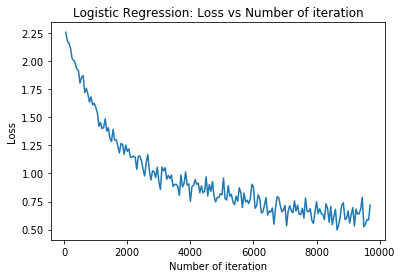

In [18]:
# visualization
plt.plot(iteration_list,loss_list)
plt.xlabel("Number of iteration")
plt.ylabel("Loss")
plt.title("Logistic Regression: Loss vs Number of iteration")
plt.show()

<a id="4"></a> <br>
### Artificial Neural Network (ANN)
- Logistic regression is good at classification but when complexity(non linearity) increases, the accuracy of model decreases.
- Therefore, we need to increase complexity of model.
- In order to <U>increase complexity</U> of model, we need to add more <U>non linear</U> functions as hidden layer. 
- I am saying again that if you do not know what is artificial neural network check my deep learning tutorial because I will not explain neural network detailed here, only explain pytorch.
- Artificial Neural Network tutorial: https://www.kaggle.com/kanncaa1/deep-learning-tutorial-for-beginners
- What we expect from artificial neural network is that when complexity increases, we use <U>more hidden layers</U> and our model can <U>adapt better</U>. As a result accuracy increase.
- **Steps of ANN:**
    1. Import Libraries
        - In order to show you, I import again but we actually imported them at previous parts.
    1. Prepare Dataset
        - Totally same with previous part(logistic regression).
        - We use same dataset so we only need train_loader and test_loader. 
        - We use same batch size, epoch and iteration numbers.
    1. Create ANN Model
        - We add 3 hidden layers.
        - We use ReLU, Tanh and ELU activation functions for diversity.
    1. Instantiate Model Class
        - input_dim = 28*28 # size of image px*px
        - output_dim = 10  # labels 0,1,2,3,4,5,6,7,8,9
        - Hidden layer dimension is 150. I only choose it as 150 there is no reason. Actually hidden layer dimension is hyperparameter and it should be chosen and tuned. You can try different values for hidden layer dimension and observe the results.
        - create model
    1. Instantiate Loss
        - Cross entropy loss
        - It also has softmax(logistic function) in it.
    1. Instantiate Optimizer
        - SGD Optimizer
    1. Traning the Model
    1. Prediction
- As a result, as you can see from plot, while loss decreasing, accuracy is increasing and our model is learning(training). 
- Thanks to <U>hidden layers</U> model learnt better and accuracy(almost 95%) is better than accuracy of logistic regression model.

In [19]:
# Import Libraries
import torch
import torch.nn as nn
from torch.autograd import Variable

In [20]:
# Create ANN Model
class ANNModel(nn.Module):
    
    # 초기화 메소드
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(ANNModel, self).__init__()
        
        # 1번째 선형 계층: (입력 차원에서 hidden 차원으로)
        # Linear function 1: 784 --> 150
        self.fc1 = nn.Linear(input_dim, hidden_dim) 
        
        # 1번째 활성화 함수: ReLU
        # Non-linearity 1
        self.relu1 = nn.ReLU()
        
        
        # 2번째 선형 계층: hidden 차원에서 동일한 hidden 차원으로
        # Linear function 2: 150 --> 150
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)
        
        # 2번째 활성화 함수: Tanh
        # Non-linearity 2
        self.tanh2 = nn.Tanh()
        
        
        # 3번째 선형 계층: hidden 차원에서 동일한 hidden 차원으로
        # Linear function 3: 150 --> 150
        self.fc3 = nn.Linear(hidden_dim, hidden_dim)
        
        # 3번째 활성화 함수: ELU
        # Non-linearity 3
        self.elu3 = nn.ELU()
        
        
        # 4번째 선형 계층 (출력 계층): hidden 차원에서 출력 차원으로
        # Linear function 4 (readout): 150 --> 10
        self.fc4 = nn.Linear(hidden_dim, output_dim)  
    
    # 순전파 메소드
    def forward(self, x):
        # 1번째 선형 계층 후 ReLU 활성화 함수 적용
        # Linear function 1
        out = self.fc1(x)
        # Non-linearity 1
        out = self.relu1(out)
        
        # 2번째 선형 계층 후 Tanh 활성화 함수 적용
        # Linear function 2
        out = self.fc2(out)
        # Non-linearity 2
        out = self.tanh2(out)
        
        # 3번째 선형 계층 후 ELU 활성화 함수 적용
        # Linear function 2
        out = self.fc3(out)
        # Non-linearity 2
        out = self.elu3(out)
        
        # 출력 계층
        # Linear function 4 (readout)
        out = self.fc4(out)
        return out

# instantiate ANN
input_dim = 28*28  # 입력 차원: 이미지 크기 (28x28 픽셀)
hidden_dim = 150 # 은닉층 차원: hidden layer dim is one of the hyper parameter and it should be chosen and tuned. For now I only say 150 there is no reason.
output_dim = 10  # 출력 차원: 클래스 개수(MNIST 경우:0부터 9까지의 숫자)

# Create ANN
model = ANNModel(input_dim, hidden_dim, output_dim)

# Cross Entropy Loss 
error = nn.CrossEntropyLoss()

# SGD Optimizer
learning_rate = 0.02
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate) # 모델의 파라미터와 학습률을 옵티마이저에 전달

In [21]:
# ANN model training
count = 0
loss_list = []
iteration_list = []
accuracy_list = []
for epoch in range(num_epochs):  # 전체 데이터셋에 대해 주어진 epoch 수만큼 반복
    for i, (images, labels) in enumerate(train_loader): # 훈련 데이터 로더를 통해 배치 단위로 데이터를 가져옴

        train = Variable(images.view(-1, 28*28)) 
        labels = Variable(labels)
        
        # Clear gradients
        optimizer.zero_grad()
        
        # Forward propagation
        outputs = model(train)
        
        # Calculate softmax and ross entropy loss
        loss = error(outputs, labels)
        
        # Calculating gradients
        loss.backward()
        
        # Update parameters
        optimizer.step()
        
        count += 1
        
        if count % 50 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Predict test dataset
            for images, labels in test_loader:

                test = Variable(images.view(-1, 28*28))
                
                # Forward propagation
                outputs = model(test)
                
                # Get predictions from the maximum value
                # 최대 확률을 가진 인덱스를 예측값으로 선택
                predicted = torch.max(outputs.data, 1)[1]
                
                # Total number of labels
                total += len(labels)

                # Total correct predictions
                correct += (predicted == labels).sum()
            
            accuracy = 100 * correct / float(total)
            
            # store loss and iteration
            loss_list.append(loss.data)
            iteration_list.append(count)
            accuracy_list.append(accuracy)
        if count % 500 == 0:
            # Print Loss
            print('Iteration: {}  Loss: {}  Accuracy: {} %'.format(count, loss.data, accuracy))

Iteration: 500  Loss: 0.707530677318573  Accuracy: 79 %
Iteration: 1000  Loss: 0.4562041461467743  Accuracy: 87 %
Iteration: 1500  Loss: 0.21118777990341187  Accuracy: 89 %
Iteration: 2000  Loss: 0.2884177565574646  Accuracy: 90 %
Iteration: 2500  Loss: 0.3052022159099579  Accuracy: 92 %
Iteration: 3000  Loss: 0.1172652319073677  Accuracy: 92 %
Iteration: 3500  Loss: 0.24783162772655487  Accuracy: 93 %
Iteration: 4000  Loss: 0.06108832359313965  Accuracy: 94 %
Iteration: 4500  Loss: 0.2958328127861023  Accuracy: 94 %
Iteration: 5000  Loss: 0.0940430760383606  Accuracy: 94 %
Iteration: 5500  Loss: 0.19282253086566925  Accuracy: 95 %
Iteration: 6000  Loss: 0.19791431725025177  Accuracy: 95 %
Iteration: 6500  Loss: 0.09944640845060349  Accuracy: 95 %
Iteration: 7000  Loss: 0.10972490906715393  Accuracy: 95 %
Iteration: 7500  Loss: 0.10976020991802216  Accuracy: 95 %
Iteration: 8000  Loss: 0.1699661761522293  Accuracy: 95 %
Iteration: 8500  Loss: 0.04255448654294014  Accuracy: 96 %
Iterati

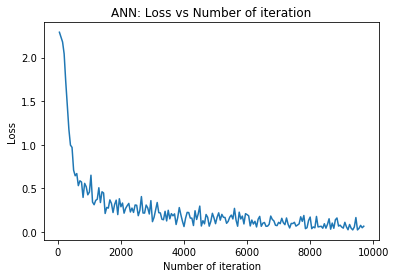

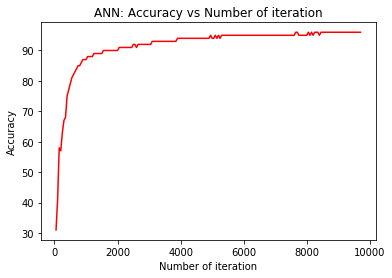

In [22]:
# visualization loss 
plt.plot(iteration_list,loss_list)
plt.xlabel("Number of iteration")
plt.ylabel("Loss")
plt.title("ANN: Loss vs Number of iteration")
plt.show()

# visualization accuracy 
plt.plot(iteration_list,accuracy_list,color = "red")
plt.xlabel("Number of iteration")
plt.ylabel("Accuracy")
plt.title("ANN: Accuracy vs Number of iteration")
plt.show()